# <center>SPEECH EMOTION RECOGNITION</center>

# INTRODUCTION:
  **Communication** is an important capability, not only based on the
linguistic part but also based on the emotional part.
In the field of **human-computer interaction (HCI)**,emotion recognition from the computer is still a challenging issue,especially when the recognition is based solely on voice, which is the basic mean of human com-munication.
So in the attempt to recognize human emotion and affective states from this project **Speech Emotion Recogniton(SER)**.

# ABOUT

### Dataset: 
The Dataset used in this project named CREMA-D taken from [kaggle](https://www.kaggle.com/datasets/ejlok1/cremad).                 
There are **six Attributes** in this Dataset:           
1. ANGRY
2. DISGUST
3. FEAR
4. HAPPY
5. NEUTRAL
6. SAD

### Project: 
The Main Objective of this project is to create a model that can efficiently classify the **EMOTIONS** by their Sound.

# DATASET

In [1]:
!pip install librosa opendatasets --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.3/214.3 KB 18.5 MB/s eta 0:00:00


In [2]:
import librosa
import pandas as pd
import librosa.display
import os
import opendatasets as opd
import matplotlib.pyplot as plt
import IPython.display as ipd
import tensorflow as tf
import tensorflow.keras.metrics


%matplotlib inline

Importing Required Libraries

In [3]:
dataset_url = "https://www.kaggle.com/datasets/ejlok1/cremad"
opd.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rohanjonnalagadda
Your Kaggle Key: ··········


100%|██████████| 451M/451M [00:21<00:00, 21.6MB/s]


Downloading and Storing the Dataset into the Memory.

In [4]:
files=os.listdir("/content/cremad/AudioWAV")
column=[]
for comp in files:
  if comp[9:12]=="ANG":
    column.append("angry")
  elif comp[9:12]=="DIS":
    column.append("disgust")
  elif comp[9:12]=="FEA":
    column.append("fear")
  elif comp[9:12]=="HAP":
    column.append("happy")
  elif comp[9:12]=="NEU":
    column.append("neutral")
  else: column.append("sad")

In the Dataset the attributes are not clearly mentioned.So,Here Iam alloting the Emotion Name to the respective data.

In [5]:
len(column)

7442

In [6]:
filepath = []
for f in files:
    fpath=os.path.join('/content/cremad/AudioWAV',f)
    filepath.append(fpath)

Getting all the filepaths of the data.

In [7]:
len(filepath)

7442

In [8]:
dataframe = pd.DataFrame({'AUDIO':files,'FILE_PATH':filepath,'EMOTION':column})

Creating a Dataframe having Columns as 
1. **AUDIO**: Contains the Name Of the File.
2. **FILE_PATH**:Contains the File path of the respective file.
3. **EMOTION**: Output Class containing the Emotion for the respective file.

In [9]:
dataframe.head(5)

,AUDIO,FILE_PATH,EMOTION
0,1034_IEO_DIS_MD.wav,/content/cremad/AudioWAV/1034_IEO_DIS_MD.wav,disgust
1,1035_IWW_DIS_XX.wav,/content/cremad/AudioWAV/1035_IWW_DIS_XX.wav,disgust
2,1007_WSI_DIS_XX.wav,/content/cremad/AudioWAV/1007_WSI_DIS_XX.wav,disgust
3,1056_ITS_SAD_XX.wav,/content/cremad/AudioWAV/1056_ITS_SAD_XX.wav,sad
4,1054_TAI_SAD_XX.wav,/content/cremad/AudioWAV/1054_TAI_SAD_XX.wav,sad


In [10]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7442 entries, 0 to 7441
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   AUDIO      7442 non-null   object
 1   FILE_PATH  7442 non-null   object
 2   EMOTION    7442 non-null   object
dtypes: object(3)
memory usage: 174.5+ KB


There is no NULL values in this Dataset

In [11]:
dataframe["EMOTION"].value_counts()

disgust    1271
sad        1271
angry      1271
fear       1271
happy      1271
neutral    1087
Name: EMOTION, dtype: int64

Here Every Attribute has equal number of items except for the **NEUTRAL**.

In [12]:
dataframe.describe()

,AUDIO,FILE_PATH,EMOTION
count,7442,7442,7442
unique,7442,7442,6
top,1034_IEO_DIS_MD.wav,/content/cremad/AudioWAV/1034_IEO_DIS_MD.wav,disgust
freq,1,1,1271


# Exploratory data analysis (EDA)

In [13]:
def load_audio(path):
  x,sr = librosa.load(path)
  return x,sr

The Function to load the File through **librosa** library.
1. **x** : Audio Time Series.
2. **sr** : Sampling Rate.

## SPECTOGRAM

In [14]:
def Plot(audio_file,sample_rate):
  X = librosa.stft(audio_file)
  Xdb = librosa.amplitude_to_db(abs(X))
  x= plt.figure(figsize=(14, 6))
  librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')
  plt.colorbar()
  return x

Function to Draw a Spectogram.

### ANGRY

In [15]:
angry = dataframe[dataframe["EMOTION"] == "angry"]["FILE_PATH"].head(1).astype(str)
angry = angry.tolist()
angry = " ".join(angry)
print(angry)

/content/cremad/AudioWAV/1011_ITH_ANG_XX.wav


sr = Sample Rate

In [16]:
angry_audio,angry_sr = load_audio(angry)

In [17]:
ipd.Audio(angry)

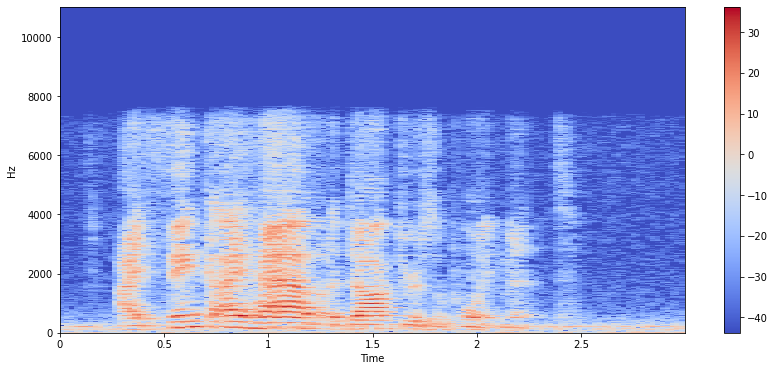

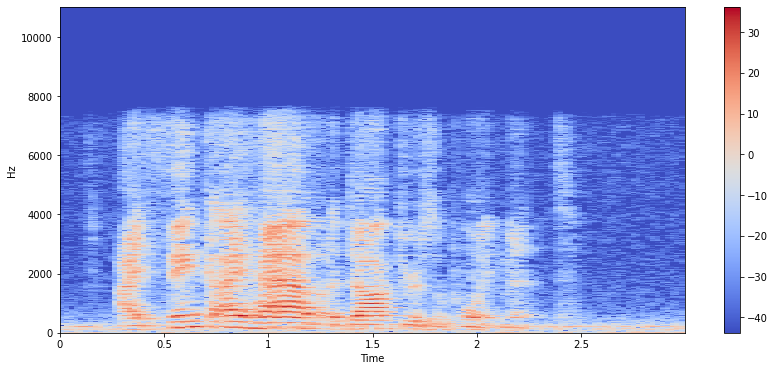

In [18]:
Plot(angry_audio,angry_sr)

### SAD

In [19]:
sad = dataframe[dataframe["EMOTION"] == "sad"]["FILE_PATH"].head(1).astype(str)
sad = sad.tolist()
sad = " ".join(sad)
print(sad)

/content/cremad/AudioWAV/1056_ITS_SAD_XX.wav


In [20]:
sad_audio,sad_sr = load_audio(sad)

In [21]:
ipd.Audio(sad)

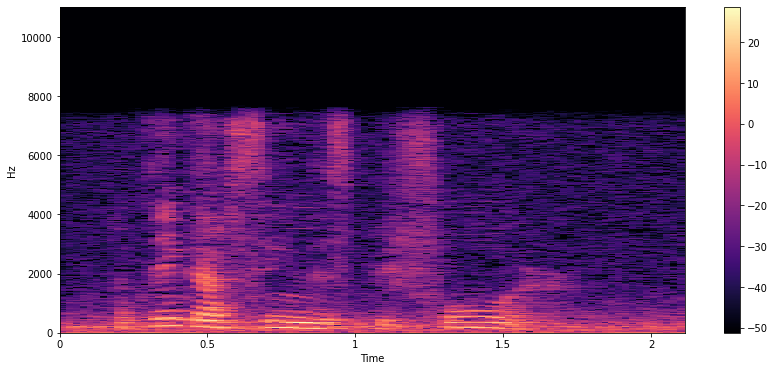

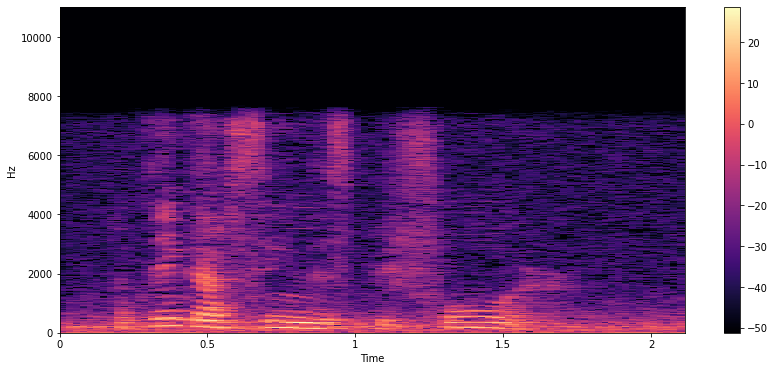

In [22]:
Plot(sad_audio,sad_sr)

### FEAR

In [23]:
fear = dataframe[dataframe["EMOTION"] == "fear"]["FILE_PATH"].head(1).astype(str)
fear = fear.tolist()
fear = " ".join(fear)
print(fear)

/content/cremad/AudioWAV/1055_IEO_FEA_HI.wav


In [24]:
fear_audio,fear_sr = load_audio(fear)

In [25]:
ipd.Audio(fear)

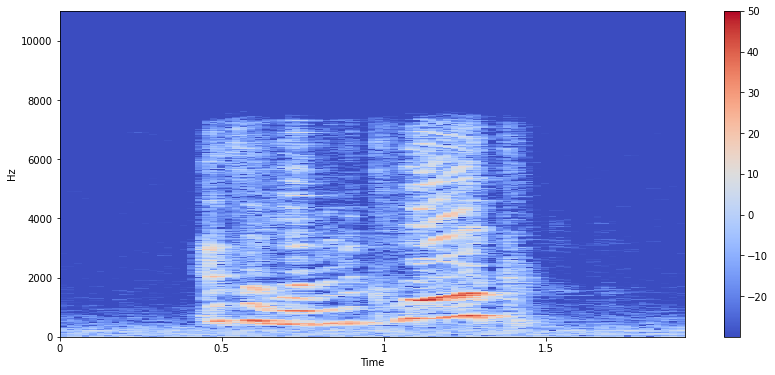

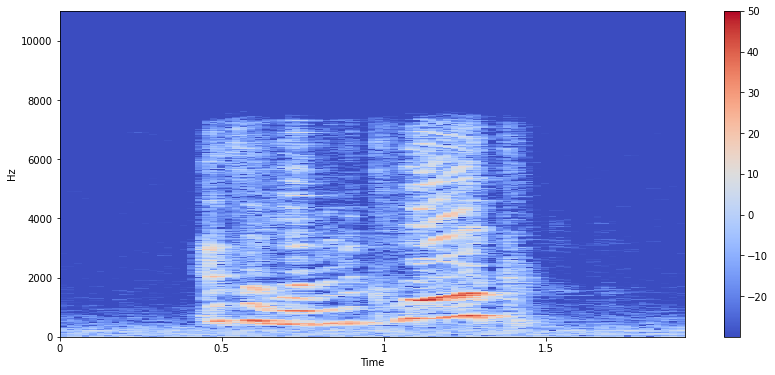

In [26]:
Plot(fear_audio,fear_sr)

### HAPPY

In [27]:
happy = dataframe[dataframe["EMOTION"] == "happy"]["FILE_PATH"].head(1).astype(str)
happy = happy.tolist()
happy = " ".join(happy)
print(happy)

/content/cremad/AudioWAV/1060_IWL_HAP_XX.wav


In [28]:
happy_audio,happy_sr = load_audio(happy)

In [29]:
ipd.Audio(happy)

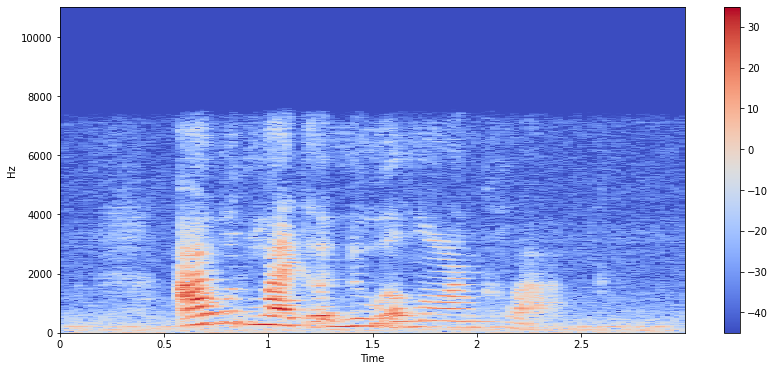

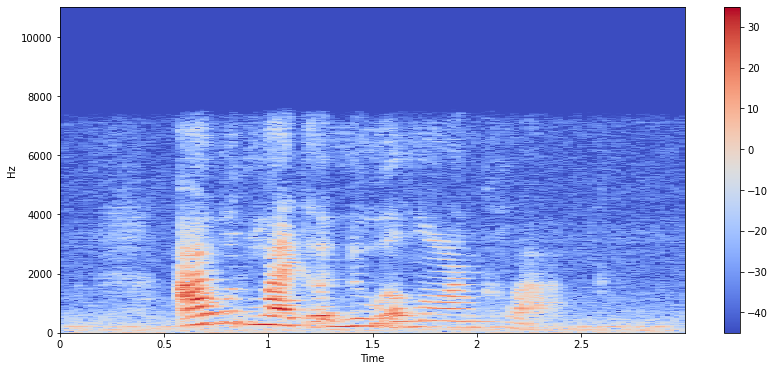

In [30]:
Plot(happy_audio,happy_sr)

### DISGUST


In [31]:
disgust = dataframe[dataframe["EMOTION"] == "disgust"]["FILE_PATH"].head(1).astype(str)
disgust = disgust.tolist()
disgust = " ".join(disgust)
print(disgust)

/content/cremad/AudioWAV/1034_IEO_DIS_MD.wav


In [32]:
disgust_audio,disgust_sr = load_audio(disgust)

In [33]:
ipd.Audio(disgust)

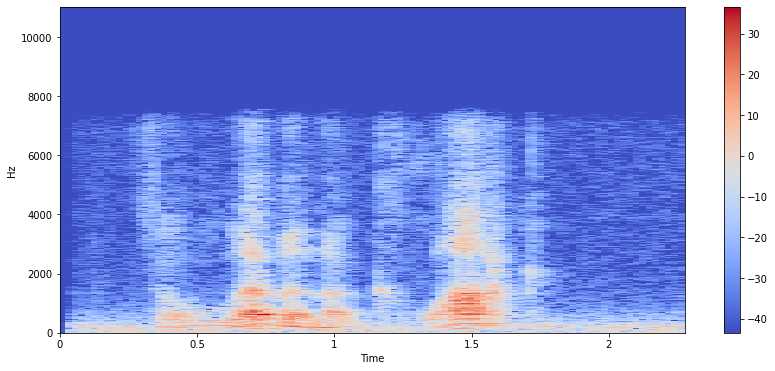

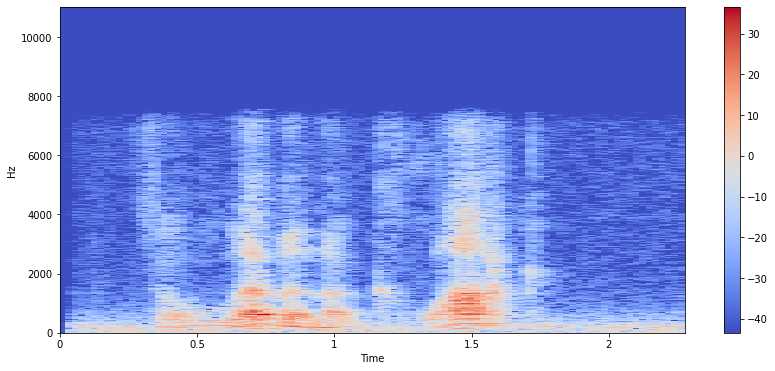

In [34]:
Plot(disgust_audio,disgust_sr)

### NEUTRAL

In [35]:
neutral = dataframe[dataframe["EMOTION"] == "neutral"]["FILE_PATH"].head(1).astype(str)
neutral = neutral.tolist()
neutral = " ".join(neutral)
print(neutral)

/content/cremad/AudioWAV/1089_TIE_NEU_XX.wav


In [36]:
neutral_audio,neutral_sr = load_audio(neutral)

In [37]:
ipd.Audio(neutral)

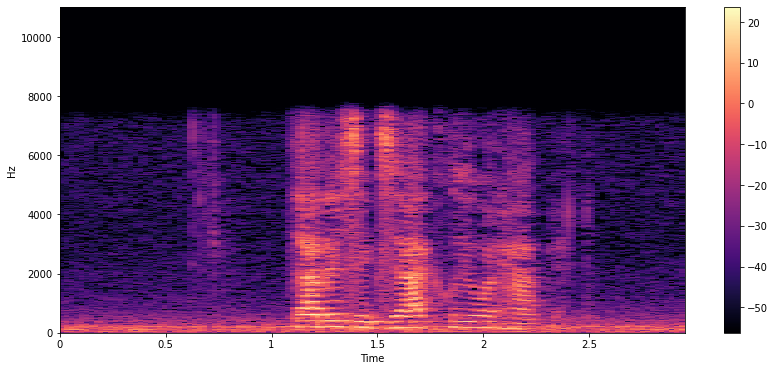

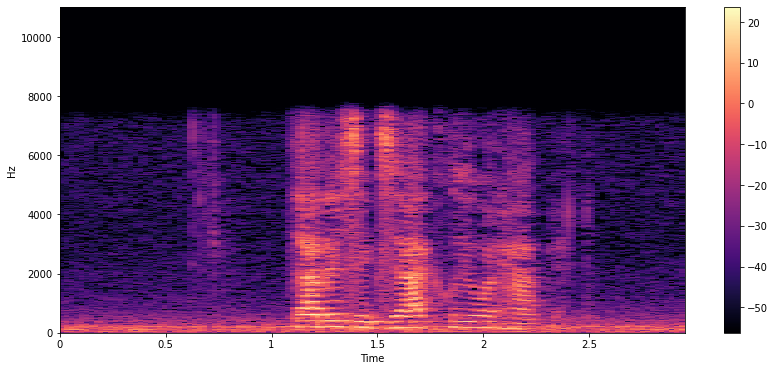

In [38]:
Plot(neutral_audio,neutral_sr)

## SOUND WAVE

In [39]:
def Wave(audio_file,sample_rate):
  X = plt.figure(figsize = (10,5))
  librosa.display.waveshow(audio_file,sr = sample_rate)
  return X

Function to draw a Sound Wave.

### Angry

In [40]:
ipd.Audio(angry)

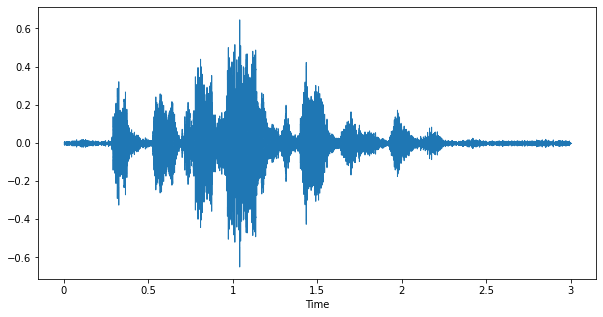

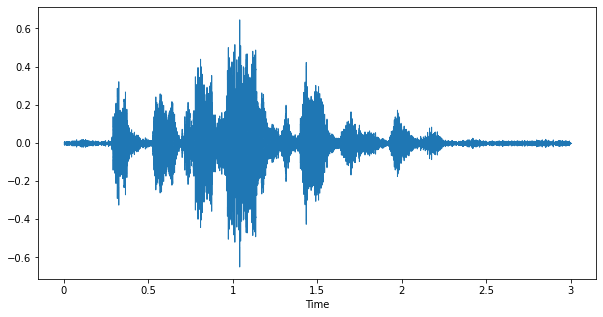

In [41]:
Wave(angry_audio,angry_sr)

### Sad

In [42]:
ipd.Audio(sad)

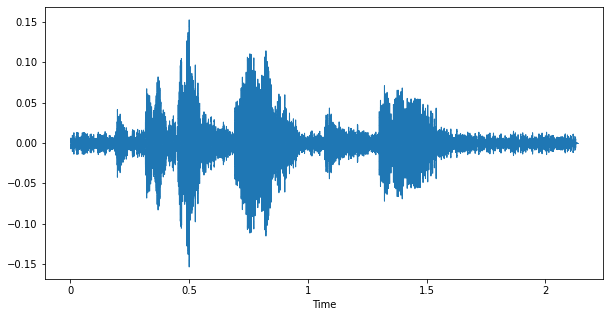

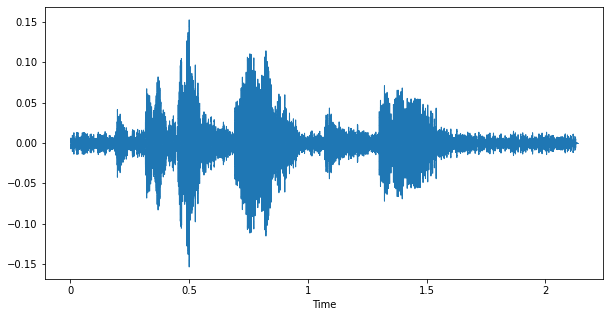

In [43]:
Wave(sad_audio,sad_sr)

### Happy

In [44]:
ipd.Audio(happy)

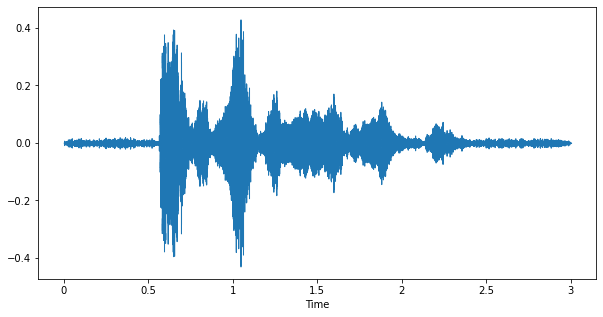

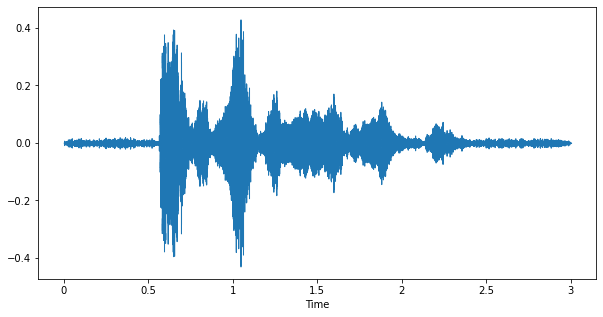

In [45]:
Wave(happy_audio,happy_sr)

### Disgust

In [46]:
ipd.Audio(disgust)

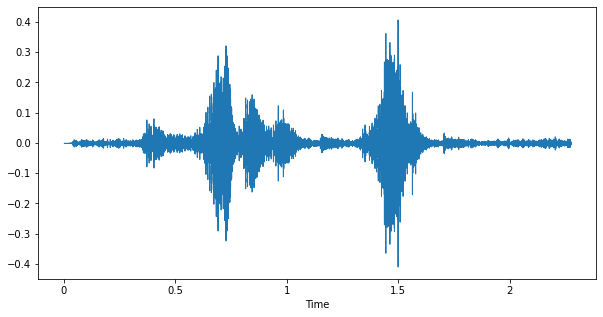

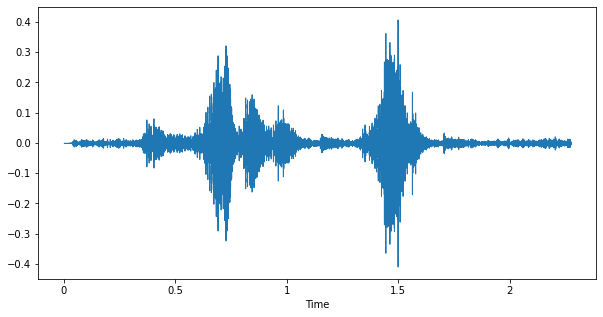

In [47]:
Wave(disgust_audio,disgust_sr)

### Neutral

In [48]:
ipd.Audio(neutral)

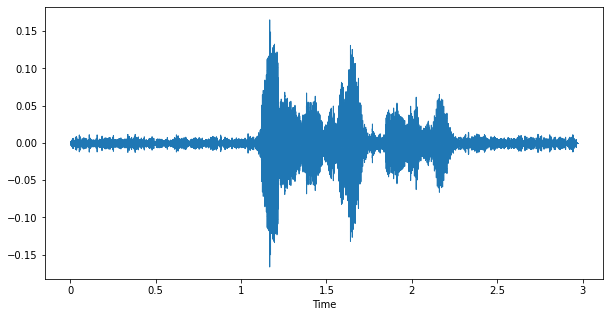

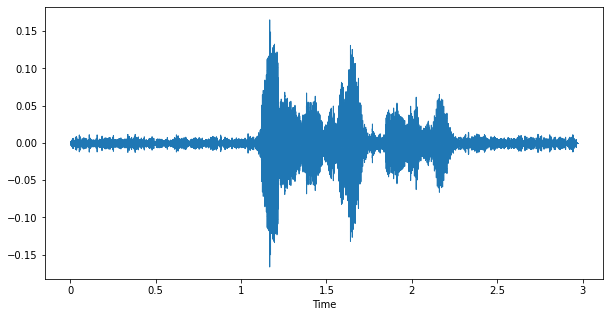

In [49]:
Wave(neutral_audio,neutral_sr)

### Fear

In [50]:
ipd.Audio(fear)

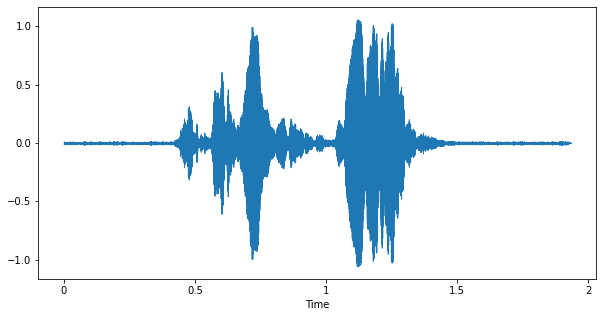

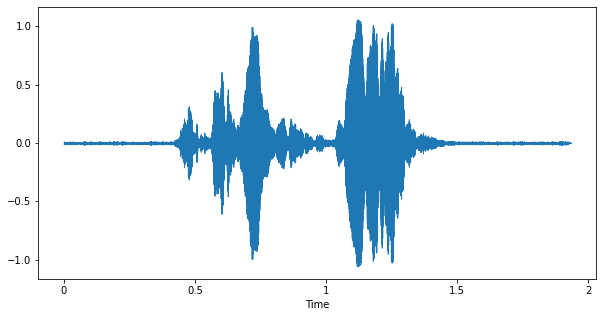

In [51]:
Wave(fear_audio,fear_sr)

# DATA PREPROCESSING

In [52]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name) 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    return mfccs_scaled_features

Here Iam creating a function to extracting the 40 main MFCC features to predict the output.

In [53]:
import numpy as np
from tqdm import tqdm

extracted_features=[]

for index_num,row in tqdm(dataframe.iterrows()):
    file_name = dataframe["FILE_PATH"][index_num]
    data=features_extractor(file_name)
    extracted_features.append(data)

7442it [13:19,  9.30it/s]


Applying the Function to every Audio file in this Dataframe.

In [54]:
type(extracted_features)

list

In [55]:
extracted_features[0]

array([-3.67761230e+02,  1.35009476e+02,  8.73301125e+00,  3.55689125e+01,
       -1.62289314e+01,  1.12273235e+01, -4.51750278e+00,  9.54590023e-01,
       -1.17489023e+01,  9.68430102e-01,  8.12159252e+00, -3.44999290e+00,
        1.79199314e+00, -1.08707733e+01, -3.42926413e-01, -7.08545685e+00,
       -4.19364959e-01, -4.59541178e+00, -3.80483460e+00,  8.90192449e-01,
       -1.37627769e+00,  2.11657310e+00, -6.83374262e+00,  1.71681535e+00,
       -1.32553530e+00,  1.73389661e+00,  3.51766229e-01, -1.20748626e-02,
        1.86938035e+00, -2.78406000e+00,  3.36691356e+00,  9.78258610e-01,
        3.20367622e+00, -1.26028657e+00, -1.09039426e-01,  9.40749407e-01,
       -7.73389041e-01,  4.06750292e-01, -2.35871077e+00, -5.17455518e-01],
      dtype=float32)

In [56]:
dataframe["FEATURES"] = extracted_features

Adding the Column into the Dataframe.

In [57]:
dataframe.head(5)

,AUDIO,FILE_PATH,EMOTION,FEATURES
0,1034_IEO_DIS_MD.wav,/content/cremad/AudioWAV/1034_IEO_DIS_MD.wav,disgust,"[-367.76123, 135.00948, 8.733011, 35.568913, -..."
1,1035_IWW_DIS_XX.wav,/content/cremad/AudioWAV/1035_IWW_DIS_XX.wav,disgust,"[-252.01869, 117.75199, -9.837154, 29.751083, ..."
2,1007_WSI_DIS_XX.wav,/content/cremad/AudioWAV/1007_WSI_DIS_XX.wav,disgust,"[-457.49274, 141.09253, 19.393772, 62.112797, ..."
3,1056_ITS_SAD_XX.wav,/content/cremad/AudioWAV/1056_ITS_SAD_XX.wav,sad,"[-407.2176, 140.02115, 10.815963, 56.1437, -13..."
4,1054_TAI_SAD_XX.wav,/content/cremad/AudioWAV/1054_TAI_SAD_XX.wav,sad,"[-437.79028, 150.57982, 16.35461, 61.208546, -..."


In [58]:
len(extracted_features)

7442

In [59]:
dataframe_1 = dataframe.copy()

Creating the Copy.

In [60]:
dataframe_1.head(5)

,AUDIO,FILE_PATH,EMOTION,FEATURES
0,1034_IEO_DIS_MD.wav,/content/cremad/AudioWAV/1034_IEO_DIS_MD.wav,disgust,"[-367.76123, 135.00948, 8.733011, 35.568913, -..."
1,1035_IWW_DIS_XX.wav,/content/cremad/AudioWAV/1035_IWW_DIS_XX.wav,disgust,"[-252.01869, 117.75199, -9.837154, 29.751083, ..."
2,1007_WSI_DIS_XX.wav,/content/cremad/AudioWAV/1007_WSI_DIS_XX.wav,disgust,"[-457.49274, 141.09253, 19.393772, 62.112797, ..."
3,1056_ITS_SAD_XX.wav,/content/cremad/AudioWAV/1056_ITS_SAD_XX.wav,sad,"[-407.2176, 140.02115, 10.815963, 56.1437, -13..."
4,1054_TAI_SAD_XX.wav,/content/cremad/AudioWAV/1054_TAI_SAD_XX.wav,sad,"[-437.79028, 150.57982, 16.35461, 61.208546, -..."


In [61]:
dataframe_1.drop(['AUDIO', 'FILE_PATH','EMOTION'], axis=1, inplace=True)

Removing All the Unnecessary Columns.

In [62]:
features_df = dataframe_1.copy()

Creating the Input Column

In [63]:
features_df

,FEATURES
0,"[-367.76123, 135.00948, 8.733011, 35.568913, -..."
1,"[-252.01869, 117.75199, -9.837154, 29.751083, ..."
2,"[-457.49274, 141.09253, 19.393772, 62.112797, ..."
3,"[-407.2176, 140.02115, 10.815963, 56.1437, -13..."
4,"[-437.79028, 150.57982, 16.35461, 61.208546, -..."
...,...
7437,"[-454.43024, 132.89505, 27.114372, 52.856735, ..."
7438,"[-423.95102, 145.19148, 6.665694, 57.006634, -..."
7439,"[-399.26093, 135.50356, 4.766939, 52.54868, -6..."
7440,"[-366.50848, 140.89542, 4.477809, 39.22633, -1..."


In [64]:
X = [x for x in features_df["FEATURES"]]
X = np.array(X)
X.shape

(7442, 40)

Converting it into an Array.

In [65]:
X = np.expand_dims(X,-1)
X.shape

(7442, 40, 1)

Reshaping so that it can pass through LSTM Model.

In [66]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(dataframe[["EMOTION"]])

One Hot Encoding for Categorical Column.

In [67]:
y = y.toarray()

Converting into Array.

In [68]:
y.shape

(7442, 6)

# LSTM Model

In [69]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

model = Sequential([
    LSTM(128, return_sequences=False, input_shape =(40,1)),
    Dense(64,activation = 'relu'),
    Dropout(0.2),
    Dense(64,activation = 'relu'),
    Dropout(0.2),
    Dense(6,activation = 'softmax')
])

model.compile(loss = 'categorical_crossentropy',optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 6)                 390       
                                                                 
Total params: 79,366
Trainable params: 79,366
Non-traina

In [70]:
history = model.fit(X, y, validation_split = 0.3, epochs = 100, batch_size = 512, shuffle = True)

Epoch 1/100
11/11 [==============================] - 7s 66ms/step - loss: 1.7922 - accuracy: 0.1762 - val_loss: 1.7881 - val_accuracy: 0.1894
Epoch 2/100
11/11 [==============================] - 0s 17ms/step - loss: 1.7827 - accuracy: 0.2085 - val_loss: 1.7675 - val_accuracy: 0.2338
Epoch 3/100
11/11 [==============================] - 0s 19ms/step - loss: 1.7389 - accuracy: 0.2407 - val_loss: 1.7005 - val_accuracy: 0.2606
Epoch 4/100
11/11 [==============================] - 0s 17ms/step - loss: 1.6822 - accuracy: 0.2724 - val_loss: 1.6433 - val_accuracy: 0.3032
Epoch 5/100
11/11 [==============================] - 0s 14ms/step - loss: 1.6515 - accuracy: 0.2870 - val_loss: 1.6173 - val_accuracy: 0.3108
Epoch 6/100
11/11 [==============================] - 0s 13ms/step - loss: 1.6295 - accuracy: 0.2985 - val_loss: 1.6052 - val_accuracy: 0.3094
Epoch 7/100
11/11 [==============================] - 0s 12ms/step - loss: 1.6036 - accuracy: 0.3083 - val_loss: 1.6200 - val_accuracy: 0.3054
Epoch 

Here We are getting an Accuracy Rate of 50%.Which is Pretty Low.This can be caused because of Many factors like More Noise in the data.

In [71]:
model.save('')

Saving The Model.